In [86]:
import pandas as pd
import seaborn as sns

In [87]:
# tips 데이터셋 로드
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


1. 컬럼의 이름을 변경 -> [총금액, 팁, 성별, 흡연여부, 요일 ,시간, 인원]
2. 총금액, 팁 컬럼의 데이터를 소수점 1자리만 두고 반올림
3. 식사 인원과 성별에 따른(그룹화) 팁의 비율의 평균 값을 구하고 그래프 시각화(바그래프)

In [88]:
# 1. 컬럼의 이름을 변경 -> [총금액, 팁, 성별, 흡연여부, 요일 ,시간, 인원]
tips.columns = ["총금액", "팁", "성별", "흡연여부", "요일", "시간", "인원"]
tips.head(1)

,총금액,팁,성별,흡연여부,요일,시간,인원
0,16.99,1.01,Female,No,Sun,Dinner,2


In [89]:
# 2. 총금액, 팁 컬럼의 데이터를 소수점 1자리만 두고 반올림
tips[["총금액", "팁"]] = round(tips[["총금액", "팁"]], 1)
tips.head(1)

,총금액,팁,성별,흡연여부,요일,시간,인원
0,17.0,1.0,Female,No,Sun,Dinner,2


In [90]:
# 3. 식사 인원과 성별에 따른(그룹화) 팁의 비율의 평균 값을 구하고 그래프 시각화(바그래프)
tips["팁비율"] = tips["팁"] / tips["총금액"] * 100
tips.head(5)

,총금액,팁,성별,흡연여부,요일,시간,인원,팁비율
0,17.0,1.0,Female,No,Sun,Dinner,2,5.882353
1,10.3,1.7,Male,No,Sun,Dinner,3,16.504854
2,21.0,3.5,Male,No,Sun,Dinner,3,16.666667
3,23.7,3.3,Male,No,Sun,Dinner,2,13.924051
4,24.6,3.6,Female,No,Sun,Dinner,4,14.634146


In [91]:
# 3. 식사 인원과 성별에 따른(그룹화) 팁의 비율의 평균 값을 구하고 그래프 시각화(바그래프)
group_data = tips[["인원", "성별", "팁비율"]].groupby(["인원", "성별"]).mean()
group_data.head()

팁비율
인원 성별               
1  Male    22.093023
   Female  21.322912
2  Male    16.273796
   Female  17.053626
3  Male    14.763093

In [92]:
# 시각화
import matplotlib.pyplot as plt

In [93]:
# window에서 matplotlib 폰트 설정
plt.rc("font", family = "Malgun Gothic")

<Axes: xlabel='인원,성별'>

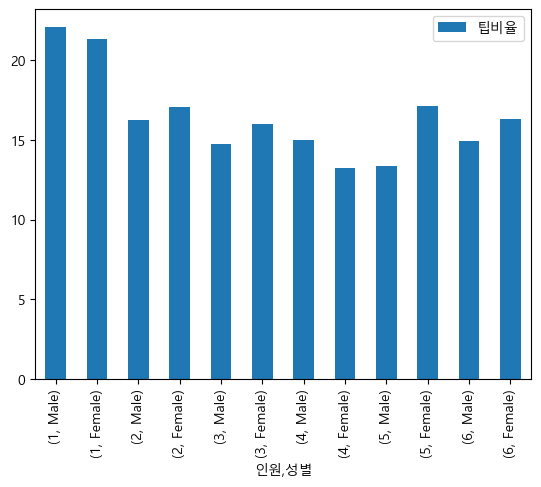

In [94]:
group_data.plot.bar()

In [95]:
group_data.index

MultiIndex([(1,   'Male'),
            (1, 'Female'),
            (2,   'Male'),
            (2, 'Female'),
            (3,   'Male'),
            (3, 'Female'),
            (4,   'Male'),
            (4, 'Female'),
            (5,   'Male'),
            (5, 'Female'),
            (6,   'Male'),
            (6, 'Female')],
           names=['인원', '성별'])

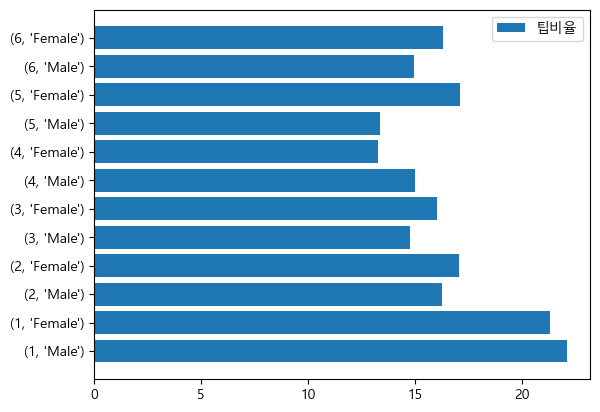

In [96]:
x = list(range(0, len(group_data.index), 1))
y = group_data["팁비율"]

plt.barh(x, y, label = "팁비율")
plt.yticks(x, group_data.index)
plt.legend()
plt.show()

In [97]:
# 남자의 데이터프레임
# 여자의 데이터프레임 으로 나눈다.
male_data = pd.DataFrame()
female_data = pd.DataFrame()

for i in group_data.index :
    if i[1] == "Male" :
        male_data = pd.concat([male_data, group_data.loc[[i]]])
    else :
        female_data = pd.concat([female_data, group_data.loc[[i]]])

In [98]:
male_data.head(1)

,,팁비율
인원,성별,
1,Male,22.093023


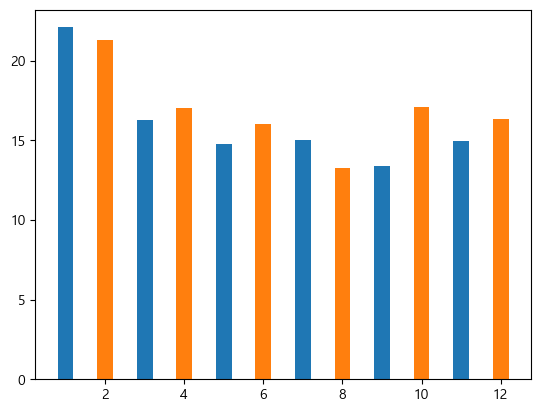

In [99]:
x = list(range(1, len(male_data) * 2, 2))
y = male_data["팁비율"]
x2 = list(range(2, (len(female_data) + 1) * 2, 2))
y2 = female_data["팁비율"]

plt.bar(x, y, width = 0.4)
plt.bar(x2, y2, width = 0.4)
plt.show()

### pivot_table
1. 그룹화
2. 인덱스, 컬럼을 기준으로 그룹화
3. 데이터 집계를 나타낸다

In [100]:
pivot_data = pd.pivot_table(
    tips,
    index = "인원",
    columns = "성별",
    values = ["팁비율"],
    aggfunc = "mean"
)

<Axes: xlabel='인원'>

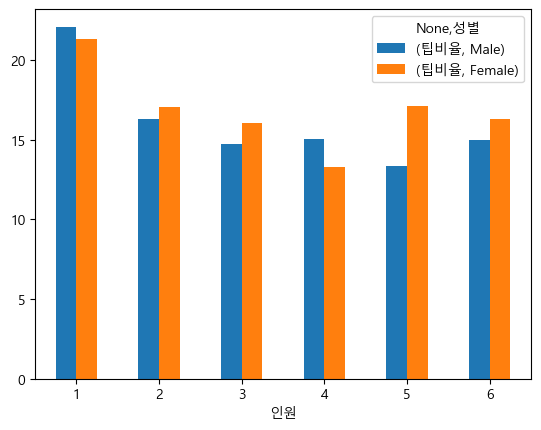

In [108]:
pivot_data.plot.bar(rot = 0)